konlpy 사용시 참고 링크에 들어가서 설치하세요

참고 : https://wikidocs.net/22488

In [1]:
#pip install kss

In [2]:
#pip install konlpy

In [3]:
#pip install tensorflow

In [4]:
# 패키지 불러오기
# import kss
# import nltk
import pandas as pd
# import numpy as np
import tensorflow
import re
# from statannot import add_stat_annotation
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import TreebankWordTokenizer
# from konlpy.tag import Hannanum
from konlpy.tag import Okt
# from konlpy.tag import Kkma
from wordcloud import WordCloud
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.feature_extraction.text import CountVectorizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.preprocessing.text import Tokenizer

# hannanum = Hannanum()
# kkma = Kkma()
okt = Okt()
# tfidf = TfidfVectorizer()
# tokenizer = Tokenizer()

In [5]:
print('OKT 형태소 분석 :',okt.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('OKT 품사 태깅 :',okt.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('OKT 명사 추출 :',okt.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요")) 

OKT 형태소 분석 : ['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '가봐요']
OKT 품사 태깅 : [('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('가봐요', 'Verb')]
OKT 명사 추출 : ['코딩', '당신', '연휴', '여행']


In [6]:
# 로우 데이터 불러오기 = df
df = pd.read_excel('dataframe10.xlsx', index_col = 0).reset_index()
df.head(2)

,0,1,2,3,4
0,유용한 연수였습니다.,유럽여행을 위한 미술 이야기,자기계발,5,유용한 연수였습니다.
1,한국 근 현대사 공부에 가장 적합한 연수입니다.,설민석의 한국사능력검정시험[심화]-하,학습지도,5,한국 근 현대사 공부에 가장 적합한 연수입니다.


In [7]:
# 컬럼명 변경
df.columns = ['제목', '연수명', '분류', '만족도', '내용']
df.head(2)

,제목,연수명,분류,만족도,내용
0,유용한 연수였습니다.,유럽여행을 위한 미술 이야기,자기계발,5,유용한 연수였습니다.
1,한국 근 현대사 공부에 가장 적합한 연수입니다.,설민석의 한국사능력검정시험[심화]-하,학습지도,5,한국 근 현대사 공부에 가장 적합한 연수입니다.


In [8]:
# 결측치 확인 True가 있으면 nan값 있음
df['내용'].isna().unique()

array([False,  True])

In [9]:
#tfidf.fit(df['내용'])
#tfidf.vocabulary_

In [10]:
# label : 1 = 만족도 5, 4 
# label : 0 = 만족도 3, 2, 1
df['label'] = df['만족도'] >= 4 
df['label'] = df['label'].astype(int)

In [11]:
# 만족도 5, 4 = df1
df1 = df[df['만족도'].isin([5, 4])]
df1

,제목,연수명,분류,만족도,내용,label
0,유용한 연수였습니다.,유럽여행을 위한 미술 이야기,자기계발,5,유용한 연수였습니다.,1
1,한국 근 현대사 공부에 가장 적합한 연수입니다.,설민석의 한국사능력검정시험[심화]-하,학습지도,5,한국 근 현대사 공부에 가장 적합한 연수입니다.,1
2,괜찮다고 토닥여주는 연수,하지현의 감정수업,생활지도,5,사람과의 관계가 너무 어려운데 나 이래도 정상일까? 괜찮아...\n때로는 마음에도 ...,1
3,성격이 그 사람이다.,MBTI로 가화만사성! 성격유형으로 보는 부부&자녀 대화법,자기계발,5,"요즘 만남에서는 ""MBTI가 뭐야?""로 시작한다. 그 사람을 더 잘 이해하고 상대할...",1
4,흥미 있는 연수네요.,EBS다큐프라임으로 배우는 생태전환교육,학습지도,5,자연 환경 생태 등에 관심 있으신 선생님들이 좋아할 연수 내용 입니다. 모처럼 즐겁...,1
...,...,...,...,...,...,...
3538,다시 복습하며 여유있게 살피고 싶은 연수,"우리 반 마음 탐구, 교실 심리학",생활지도,5,급하게 연수를 마치면서도 여유롭게 다시 살피고 싶은 연수였습니다.,1
3539,모험놀이로 다시 시작!,"변화의 시작, 기적의 모험놀이상담",생활지도,5,친구의 말에는 관심 없고 자신의 말만 하는 학생들에게 배려하고 협동하라는 말을 입에...,1
3540,무릎이 아프지만 동아리 수업을 위한 줄넘기 연수,즐겁고 건강한 줄넘기 수업 만들기,생활지도,5,20년만에 다시 6학년을 지도하게 되었습니다. 반별 동아리 시간에 학생들과 어떤 수...,1
3541,하지현의 감정수업,하지현의 감정수업,생활지도,5,감정에 대한 이해를 통해 많은 위로를 받게 되는 수업이다.,1


In [12]:
# 만족도 3, 2, 1 = df2
df2 = df[df['만족도'].isin([2, 1])] #3제거-수정됨
df2

,제목,연수명,분류,만족도,내용,label
590,연수 후기,그림으로 배우는 한국사 이미지 노트 1,교과지도,1,역사를 좋아하고 재미있어서 역사 연수를 많이 받는다. 그래서 이 연수도 재미있을 것...,0
664,너무 쉬워요,영어로 세계 속으로 with 내셔널 지오그래픽,어학,2,너무 쉽네요. 교사가 듣기엔 정말 쉬워서 아쉽네요. 제목에 초급이라고 명시해주시면 ...,0
946,너무 지루한 연수,독서지도사 양성과정 1,학습지도,1,"너무 지루해요. 30차시 중 인지발달, 문학 개념 등 이론 부분이 절반 넘게 차지해...",0
1075,와인 관심있는 분만!,아는 만큼 즐기는 올 댓 와인,자기계발,2,와인에 대해 깊은 공부하고 싶은 분은 좋겠어요. 저는 약간 지루했어요..,0
1159,7만5천원짜리 pdf 파일을 산 연수,성공적인 교직 수행을 위한 필수 교직실무2,자기계발,1,나는 교직에 대한 원리와 기본 개념을 배우겠다 싶은 분들만 들으세요.\n사실 연수를...,0
1231,추천하고 싶지 않아요.,시크릿 플레이리스트 슈퍼콘서트,자기계발,1,음향도 별로고 나누는 대화도 도움이 되지 않았어요. 개인적으로는 연수가 별로였습니다.,0
1283,필기 시험 문제가 너무 이상해요,"힐링여행, 유네스코 세계문화유산을 찾아서",자기계발,1,"이런 연수는 처음입니다.\n수업, 학생지도, 평가관리 등으로 바쁜시간을 쪼개어 세계...",0
1387,마음 치유가 안되네요,마음치유 수업: 교사로 사는 나 이해하기,자기계발,1,마음치유가 될 줄 알았는데 그렇지 않네요.,0
2074,연수내용 및 난이도는 좋았습니다만,해커스톡 영어회화 10분의 기적 - 아는 단어로 말하기,어학,1,다른 OTT 서비스를 가입하면 무료로 볼수 있는 영상입니다. 유료로 운영되는 과정이...,0
2185,연수내용과 평가가 다른 연수~,Essential Grammar in Use,어학,1,연수를 들을 때는 어렵지 않았는데 출석평가문제는 연수 내용에 없는 어려운 문제가 출...,0


In [13]:
#전처리 함수 만들기
def preprocessing(review, okt, remove_stopwords = False, stop_words =[]):
    #함수인자설명
    # review: 전처리할 텍스트
    # okt: okt객체를 반복적으로 생성하지 않고 미리 생성 후 인자로 받음\
    # remove_stopword: 불용어를 제거할지 여부 선택. 기본값 False
    # stop_words: 불용어 사전은 사용자가 직접 입력, 기본값 빈 리스트

    # 1. 한글 및 공백 제외한 문자 모두 제거
    review_text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]','',review)

    #2. okt 객체를 활용하여 형태소 단어로 나눔
    word_review = okt.morphs(review_text,stem=True)

    if remove_stopwords:
        #3. 불용어 제거
        word_review = [token for token in word_review if not token in stop_words]
    return word_review

In [15]:
# 불용어 제거 = https://www.ranks.nl/stopwords/korean
f = open("Korean Stopwords.txt", "r", encoding='UTF8')

lst = []
while True:
    line = f.readline().strip()
    if not line: break
    lst.append(line)

In [16]:
# 줄바꿈 제거 추가
lst2 = ['\n', '\n\n', '\n\n\n', '\n\n\n\n', '\n\n\n\n\n']
lst.extend(lst2)

In [17]:
# 로우 데이터 = df 전처리
stop_words = lst
clean_review_df = []

for review in df['내용']:
    # 리뷰가 문자열인 경우만 전처리 진행
    if type(review) == str:
        clean_review_df.append(preprocessing(review,okt,remove_stopwords = True, stop_words = stop_words))
    else:
        clean_review_df.append([]) #str이 아닌 행은 빈칸으로 놔두기
clean_review_df

[['유용하다', '연수', '이다'],
 ['한국', '근', '현', '대사', '공부', '가장', '적합하다', '연수', '이다'],
 ['사람',
  '과의',
  '관계',
  '너무',
  '어렵다',
  '이래도',
  '정상',
  '이다',
  '괜찮다',
  '때로는',
  '마음',
  '에도',
  '없다',
  '말로',
  '대답',
  '하다',
  '데',
  '거짓말',
  '하다',
  '어쩌지',
  '괜찮다',
  '직업',
  '상',
  '지시',
  '전혀',
  '따르다',
  '않다',
  '학생',
  '그렇다',
  '그렇다',
  '괜찮다',
  '사람',
  '과의',
  '관계',
  '힘들다',
  '너무',
  '지치다',
  '수',
  '거',
  '라면',
  '괜찮다',
  '어떻다',
  '피해',
  '도덕',
  '적',
  '잘',
  '못',
  '되다',
  '아니다',
  '거짓말',
  '분위기',
  '상대',
  '기분',
  '살피다',
  '하다',
  '말',
  '은',
  '괜찮다',
  '말',
  '해주다',
  '교사',
  '지시',
  '불응',
  '하다',
  '학생',
  '은',
  '내',
  '잘못',
  '한',
  '아니다',
  '학생',
  '상태',
  '그렇다',
  '이니',
  '잘못',
  '아니다',
  '꼭',
  '가르치다',
  '하다',
  '평',
  '정심',
  '가지',
  '고',
  '반복',
  '하다',
  '바르게',
  '가르치다',
  '노력',
  '하다',
  '되다',
  '라고',
  '말',
  '해주다',
  '삶',
  '순간',
  '순간',
  '의문',
  '들다',
  '이래도',
  '되다',
  '하다',
  '문제',
  '대해',
  '조',
  '근',
  '조',
  '근',
  '설명',
  '해주다',
  '강사',
  '님',
  '덕분',
  '마음',
  '위안',

In [18]:
# 만족도 5, 4 = df1 전처리
stop_words = lst
clean_review_df1 = []

for review in df1['내용']:
    # 리뷰가 문자열인 경우만 전처리 진행
    if type(review) == str:
        clean_review_df1.append(preprocessing(review,okt, remove_stopwords = True, stop_words = stop_words))
    else:
        clean_review_df1.append([]) #str이 아닌 행은 빈칸으로 놔두기
clean_review_df1

[['유용하다', '연수', '이다'],
 ['한국', '근', '현', '대사', '공부', '가장', '적합하다', '연수', '이다'],
 ['사람',
  '과의',
  '관계',
  '너무',
  '어렵다',
  '이래도',
  '정상',
  '이다',
  '괜찮다',
  '때로는',
  '마음',
  '에도',
  '없다',
  '말로',
  '대답',
  '하다',
  '데',
  '거짓말',
  '하다',
  '어쩌지',
  '괜찮다',
  '직업',
  '상',
  '지시',
  '전혀',
  '따르다',
  '않다',
  '학생',
  '그렇다',
  '그렇다',
  '괜찮다',
  '사람',
  '과의',
  '관계',
  '힘들다',
  '너무',
  '지치다',
  '수',
  '거',
  '라면',
  '괜찮다',
  '어떻다',
  '피해',
  '도덕',
  '적',
  '잘',
  '못',
  '되다',
  '아니다',
  '거짓말',
  '분위기',
  '상대',
  '기분',
  '살피다',
  '하다',
  '말',
  '은',
  '괜찮다',
  '말',
  '해주다',
  '교사',
  '지시',
  '불응',
  '하다',
  '학생',
  '은',
  '내',
  '잘못',
  '한',
  '아니다',
  '학생',
  '상태',
  '그렇다',
  '이니',
  '잘못',
  '아니다',
  '꼭',
  '가르치다',
  '하다',
  '평',
  '정심',
  '가지',
  '고',
  '반복',
  '하다',
  '바르게',
  '가르치다',
  '노력',
  '하다',
  '되다',
  '라고',
  '말',
  '해주다',
  '삶',
  '순간',
  '순간',
  '의문',
  '들다',
  '이래도',
  '되다',
  '하다',
  '문제',
  '대해',
  '조',
  '근',
  '조',
  '근',
  '설명',
  '해주다',
  '강사',
  '님',
  '덕분',
  '마음',
  '위안',

In [19]:
# 만족도 3, 2, 1 = df2 전처리 #남인경-3제거
stop_words = lst
clean_review_df2 = []

for review in df2['내용']:
    # 리뷰가 문자열인 경우만 전처리 진행
    if type(review) == str:
        clean_review_df2.append(preprocessing(review,okt, remove_stopwords = True, stop_words = stop_words))
    else:
        clean_review_df2.append([]) #str이 아닌 행은 빈칸으로 놔두기
clean_review_df2

[['역사',
  '좋아하다',
  '재미있다',
  '역사',
  '연수',
  '많이',
  '받다',
  '연수',
  '도',
  '재미있다',
  '신청',
  '하다',
  '지금',
  '받다',
  '역사',
  '연수',
  '달라',
  '서',
  '학원',
  '식',
  '강의',
  '여서',
  '연수',
  '제목',
  '그림',
  '배우다',
  '한국사',
  '이미지',
  '노트',
  '인지',
  '자다',
  '모르다',
  '개인',
  '적',
  '인',
  '생각',
  '지금',
  '까지의',
  '연수',
  '는',
  '정말',
  '재미있다',
  '가다',
  '줄',
  '모르다',
  '받다',
  '연수',
  '는',
  '내용',
  '세',
  '번',
  '반복',
  '하다',
  '필기',
  '그림',
  '정리',
  '지루하다',
  '부분',
  '도',
  '전체',
  '적',
  '초등학교',
  '선생님',
  '보다는',
  '중등',
  '선생님',
  '께',
  '적합하다',
  '강의',
  '인',
  '마지막',
  '연수',
  '이다'],
 ['너무',
  '쉬다',
  '교사',
  '듣기',
  '엔',
  '정말',
  '쉽다',
  '아쉽다',
  '제목',
  '초',
  '급',
  '이라고',
  '명시',
  '해주다',
  '좋다',
  '연수',
  '영어',
  '는',
  '반복',
  '이다',
  '해',
  '일리',
  '샘',
  '이다',
  '하다',
  '연수',
  '내용',
  '은',
  '지문',
  '한번',
  '만',
  '들려주다',
  '반복',
  '안',
  '해주다',
  '아쉽다'],
 ['너무',
  '지루하다',
  '차다',
  '중',
  '인지발달',
  '문학',
  '개념',
  '이론',
  '부분',
  '절반',
  '넘다',
  '차지',
  '하다',
  '크다',
  '

In [20]:
# # 로우 데이터 불러오기 = df 
# sequences = tokenizer.texts_to_sequences(clean_review_df)

# word_vocab = tokenizer.word_index #단어사전형태
# MAX_SEQUENCE_LENGTH = 8 #문장 최대 길이

# #데이터
# df_inputs = pad_sequences(sequences,maxlen=MAX_SEQUENCE_LENGTH,padding='post')

# #데이터 라벨 벡터화
# df_labels = np.array(df['label'])

In [21]:
#df_inputs

In [22]:
#df_labels

# 1. 만족도로 분류한 긍정/부정 단어 빈도 시각화

In [23]:
## 민수님 파일: 만족도로 분류한 긍정과 부정 그룹

In [24]:
high_data=clean_review_df1
low_data=clean_review_df2

In [25]:
#한 리스트로 결합
def list_smaller(l):
    oneline=[]
    for data in l:
        oneline+=data
    return oneline
high=list_smaller(high_data)
low=list_smaller(low_data)

In [26]:
from collections import Counter

counter=Counter(high)
high_counter=pd.DataFrame.from_dict(data=dict(counter),orient='index')
high_counter.reset_index(inplace=True)
high_counter.columns = ['단어','갯수']

counter=Counter(low)
low_counter=pd.DataFrame.from_dict(data=dict(counter),orient='index')
low_counter.reset_index(inplace=True)
low_counter.columns = ['단어','갯수']



In [27]:
# 갯수 많은 순서대로 확인
# high_counter.sort_values('갯수',ascending=False) 
# low_counter.sort_values('갯수',ascending=False)

In [28]:
#불용어 사전(부정,긍정 그룹 중 공통 단어 삭제)
low_word=list(low_counter['단어'])
high_word=list(high_counter['단어'])

# 같은 문자 제거
def del_common_word(counter,word):
    handle=counter['단어'].apply(lambda x: True if x in word else False) #같은 단어면 True
    counter_comm=counter[handle]# 같은 문자가 어떤 것인지 마스킹 됨
    
    print(counter_comm[counter_comm['갯수']>5])# 출력-삭제 대상
    common=list(counter_comm[counter_comm['갯수']>5]['단어'])# high에서 없애야할 대상(조건: 5번 이상 반복 출현)
    return counter[counter['단어'].apply(lambda x: False if x in common else True)] #제거된 상황
high_counter_diff= del_common_word(high_counter,low_word)
low_counter_diff=del_common_word(low_counter,high_word)

        단어    갯수
1       연수  2880
2       이다  1663
7       공부   411
9     적합하다     8
13      너무   318
...    ...   ...
3151    노트    22
3205  아이패드    24
3317    원리     7
4188     비    22
4967    메다    10

[229 rows x 2 columns]
     단어  갯수
3    연수  24
6     도   8
8    하다  22
26    적   7
30    는   9
34   내용   6
50   이다   7
68    은   6
97   들다  10
102  되다   8
131  문제   6


In [29]:
low_counter_diff.sort_values('갯수',ascending=False)

,단어,갯수
27,인,5
62,해주다,5
5,받다,5
107,않다,5
71,만,5
...,...,...
127,문화유산,1
129,보내다,1
130,퀴즈,1
132,온라인,1


### 긍정적(점수 높음)

In [30]:
high_counter_diff_dict=high_counter_diff.set_index('단어').to_dict()
high_review=high_counter_diff_dict['갯수']
high_review

{'유용하다': 193,
 '한국': 28,
 '근': 17,
 '현': 28,
 '대사': 4,
 '가장': 55,
 '사람': 114,
 '과의': 28,
 '관계': 26,
 '이래도': 6,
 '정상': 6,
 '괜찮다': 31,
 '때로는': 12,
 '말로': 11,
 '대답': 5,
 '데': 52,
 '거짓말': 7,
 '어쩌지': 5,
 '직업': 42,
 '상': 16,
 '지시': 9,
 '전혀': 25,
 '따르다': 148,
 '지치다': 46,
 '라면': 29,
 '피해': 5,
 '도덕': 3,
 '잘': 72,
 '못': 183,
 '분위기': 17,
 '상대': 14,
 '기분': 45,
 '살피다': 3,
 '말': 322,
 '불응': 3,
 '내': 182,
 '상태': 22,
 '꼭': 205,
 '가르치다': 97,
 '평': 3,
 '정심': 3,
 '가지': 115,
 '바르게': 5,
 '노력': 74,
 '라고': 74,
 '삶': 51,
 '순간': 21,
 '의문': 11,
 '조': 13,
 '강사': 266,
 '덕분': 65,
 '위안': 7,
 '얻다': 86,
 '이렇게': 89,
 '갖다': 71,
 '감사하다': 531,
 '지현': 5,
 '교수': 27,
 '요즘': 59,
 '만남': 5,
 '에서는': 42,
 '시작': 143,
 '다': 223,
 '오해': 8,
 '섭섭하다': 3,
 '덜': 14,
 '생기': 23,
 '상황': 139,
 '유형': 12,
 '특성': 16,
 '주어': 25,
 '알': 475,
 '가족': 17,
 '대다': 8,
 '넓다': 9,
 '자연': 35,
 '생태': 9,
 '모처럼': 2,
 '즐겁다': 184,
 '옥': 12,
 '이샘': 11,
 '자료': 108,
 '덤': 7,
 '완제': 3,
 '품': 5,
 '학습': 177,
 '라서': 37,
 '인쇄': 6,
 '투여': 3,
 '쓰다': 86,
 '교실': 245,
 '해보다

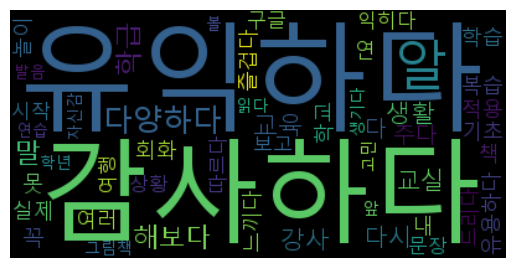

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 한글 폰트 설정(.ttf파일 다운로드 후 실행)
wordcloud_high = WordCloud('C:\Windows\Fonts'+'\malgun.ttf',max_words=50).generate_from_frequencies(high_review)
plt.imshow(wordcloud_high, interpolation='bilinear')
plt.axis('off')
plt.show()

## 부정적(점수 낮음)

In [32]:
low_counter_diff_dict=low_counter_diff.set_index('단어').to_dict()
low_review=low_counter_diff_dict['갯수']
low_review

{'역사': 3,
 '좋아하다': 1,
 '재미있다': 3,
 '많이': 2,
 '받다': 5,
 '신청': 2,
 '지금': 2,
 '달라': 1,
 '서': 1,
 '학원': 1,
 '식': 2,
 '강의': 4,
 '여서': 2,
 '제목': 2,
 '그림': 4,
 '배우다': 2,
 '한국사': 1,
 '이미지': 1,
 '노트': 1,
 '인지': 1,
 '자다': 1,
 '모르다': 2,
 '개인': 3,
 '인': 5,
 '생각': 2,
 '까지의': 1,
 '정말': 4,
 '가다': 2,
 '줄': 2,
 '세': 1,
 '번': 1,
 '반복': 3,
 '필기': 3,
 '정리': 2,
 '지루하다': 3,
 '부분': 2,
 '전체': 1,
 '초등학교': 1,
 '선생님': 2,
 '보다는': 1,
 '중등': 1,
 '께': 1,
 '적합하다': 1,
 '마지막': 2,
 '너무': 4,
 '쉬다': 1,
 '교사': 3,
 '듣기': 1,
 '엔': 1,
 '쉽다': 2,
 '아쉽다': 2,
 '초': 1,
 '급': 1,
 '이라고': 1,
 '명시': 1,
 '해주다': 5,
 '좋다': 4,
 '영어': 3,
 '해': 1,
 '일리': 1,
 '샘': 1,
 '지문': 1,
 '한번': 1,
 '만': 5,
 '들려주다': 1,
 '안': 2,
 '차다': 1,
 '중': 1,
 '인지발달': 1,
 '문학': 1,
 '개념': 2,
 '이론': 1,
 '절반': 1,
 '넘다': 1,
 '차지': 1,
 '크다': 1,
 '도움': 3,
 '안되다': 1,
 '와인': 1,
 '대해': 1,
 '깊다': 1,
 '공부': 1,
 '하고': 2,
 '싶다': 3,
 '분': 3,
 '교직': 2,
 '대한': 1,
 '원리': 1,
 '기본': 1,
 '사실': 2,
 '필요없다': 1,
 '파일': 1,
 '보다': 4,
 '진짜': 2,
 '실무': 1,
 '로서': 1,
 '필요하다': 1,
 '않다': 5,
 '원론':

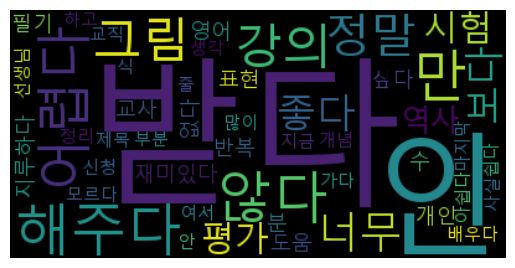

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 한글 폰트 설정(.ttf파일 다운로드 후 실행)
wordcloud_low = WordCloud('C:\Windows\Fonts'+'\malgun.ttf',max_words=50).generate_from_frequencies(low_review)
plt.imshow(wordcloud_low, interpolation='bilinear')
plt.axis('off')
plt.show()

In [34]:
## 파이

In [35]:
# 파이 출력을 위해 상위 10개만 파이로 출력
for_pie_high=high_counter_diff.sort_values('갯수',ascending=False)[:25]
for_pie_low=low_counter_diff.sort_values('갯수',ascending=False)[:25]

In [37]:
from dash import Dash, html, dcc, callback, Output, Input
import plotly.express as px

app = Dash(__name__)

high_wordcloud=px.imshow(wordcloud_high)
low_wordcloud=px.imshow(wordcloud_low)
# high_pie=px.pie(for_pie_high,values='갯수',names='단어')
# low_pie=px.pie(for_pie_low,values='갯수',names='단어')
high_graph=px.bar(for_pie_high,y='갯수',x='단어')
low_graph=px.bar(for_pie_low,y='갯수',x='단어')


app.layout = html.Div([
    html.Div([
        html.H1(children='긍정_워드클라우드', style={'textAlign':'center'}),
        dcc.Graph(figure=high_wordcloud),
    ],style={'width': '600px', 'height':'600px','margin': '0px 50px 50px 50px','display':'inline-block'}),
    html.Div([
        html.H1(children='부정_워드클라우드', style={'textAlign':'center'}),
        dcc.Graph(figure=low_wordcloud),
    ],style={'width': '600px', 'height':'600px','margin': '0px 50px 50px 50px','display':'inline-block'}),
    html.Div([
        html.H1(children='긍정 상위 25개', style={'textAlign':'center'}),
        dcc.Graph(figure=high_graph),
    ],style={'width': '600px', 'height':'600px','margin': '0px 50px 50px 50px','display':'inline-block'}),
    html.Div([
        html.H1(children='부정 상위 25개', style={'textAlign':'center'}),
        dcc.Graph(figure=low_graph),
    ],style={'width': '600px', 'height':'600px','margin': '0px 50px 50px 50px','display':'inline-block'})
],style={'width': '2000px'})

if __name__ == '__main__':
    app.run(debug=True)


# 2. 감성사전으로 분류한 긍정과 부정 그룹

In [38]:
jisu_df=pd.read_excel("df10.xlsx")
jisu_df

,review,sentiment,pre_label
0,유용 한 연수 였 습니다 .,0,1
1,한국 근 현대사 공부 에 가장 적합 한 연수 입니다 .,0,1
2,사람 과 의 관계 가 너무 어려운데 나 이래도 정상 일까 ? 괜찮 아 . .. 때로...,-6,0
3,"요즘 만남 에서 는 "" MBTI 가 뭐 야 ? "" 로 시작 한다 . 그 사람 을 더...",-2,0
4,자연 환경 생태 등 에 관심 있 으신 선생 님 들 이 좋 아 할 연수 내용 입니다 ...,1,1
...,...,...,...
3472,급하 게 연수 를 마치 면서 도 여유 롭 게 다시 살피 고 싶 은 연수 였 습니다 .,1,1
3473,친구 의 말 에 는 관심 없 고 자신 의 말 만 하 는 학생 들 에게 배려 하 고 ...,4,1
3474,20 년 만 에 다시 6 학년 을 지도 하 게 되 었 습니다 . 반별 동아리 시간 ...,5,1
3475,감정 에 대한 이해 를 통해 많 은 위로 를 받 게 되 는 수업 이 다 .,-1,0


In [39]:
# 전처리
jisu_df['sentiment'].unique() #문제 없음

array([ 0, -6, -2,  1,  3,  2, -3,  9,  5, -1,  4, -4, 11,  7, -5,  6, -7,
        8, -8, -9, 17, 10, 12], dtype=int64)

In [40]:
positive_con=jisu_df['sentiment']>=0
positive=jisu_df[positive_con] #긍정 그룹
negative=jisu_df[-positive_con] #부정 그룹
len(positive), len(negative)

(2446, 1031)

In [41]:
def unify(li):
    divided=[]
    for l in li:
        divided.append(l.split())
    return divided
positive_li=unify(list(positive['review']))
negative_li=unify(list(negative['review']))

In [42]:
#한 리스트로 결합
def list_smaller(l):
    oneline=[]
    for data in l:
        oneline+=data
    return oneline
posi_l=list_smaller(positive_li)
nega_l=list_smaller(negative_li)

In [43]:
#불용어 사전 
new_posi=[]
for l in posi_l:
    if l in lst: #korean stopword 삭제
        pass
    elif re.search('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]',l): # 한글이 아닌 내용 삭제
        pass
    else:
        new_posi.append(l) # 남은 내용만 모으기
new_posi

['유용',
 '한',
 '연수',
 '였',
 '한국',
 '근',
 '현대사',
 '공부',
 '가장',
 '적합',
 '한',
 '연수',
 '입니다',
 '자연',
 '환경',
 '생태',
 '관심',
 '있',
 '으신',
 '선생',
 '님',
 '좋',
 '할',
 '연수',
 '내용',
 '입니다',
 '모처럼',
 '즐겁',
 '고',
 '재미있',
 '게',
 '받',
 '은',
 '연수',
 '중',
 '였',
 '좋',
 '은',
 '연수',
 '감사',
 '합니다',
 '옥',
 '샘',
 '자료',
 '덤',
 '얻',
 '어서',
 '좋',
 '아요',
 '완제품',
 '학습',
 '자료',
 '라서',
 '인쇄',
 '만',
 '면',
 '수업',
 '투여',
 '할',
 '수',
 '있',
 '좋',
 '네요',
 '잘',
 '쓰',
 '겠',
 '배운',
 '내용',
 '교실',
 '수업',
 '해',
 '보',
 '겠',
 '감사',
 '합니다',
 '다양',
 '한',
 '가수',
 '더',
 '다양',
 '한',
 '노래',
 '뺏긴',
 '기',
 '에너지',
 '충전',
 '는',
 '었',
 '맨날',
 '바쁜지',
 '학기',
 '말',
 '되',
 '도록',
 '할',
 '체크',
 '고',
 '지워',
 '면서',
 '기말',
 '맞이',
 '고',
 '있',
 '네요',
 '오늘',
 '도',
 '여러',
 '가지',
 '진행',
 '고',
 '마쳤',
 '장마철',
 '라',
 '기운',
 '도',
 '없',
 '고',
 '기분',
 '도',
 '다운',
 '되',
 '는데',
 '좋',
 '은',
 '음악',
 '힐링',
 '고',
 '싶',
 '은',
 '오후',
 '입니다',
 '연수',
 '기간',
 '내',
 '느라',
 '급히',
 '은',
 '느낌',
 '인데',
 '천천히',
 '복기',
 '면서',
 '다시',
 '한번',
 '더',
 '수',
 '있',
 '으면',
 '좋',
 '겠',
 '

In [44]:
new_nega=[]
for l in nega_l:
    if l in lst: #korean stopword 삭제
        pass
    elif re.search('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]',l): # 한글이 아닌 내용 삭제
        pass
    else:
        new_nega.append(l) # 남은 내용만 모으기
new_nega

['사람',
 '관계',
 '너무',
 '어려운데',
 '이래도',
 '정상',
 '일까',
 '괜찮',
 '때로',
 '는',
 '마음',
 '도',
 '없',
 '는',
 '말',
 '대답',
 '는',
 '데',
 '거짓말',
 '해서',
 '어쩌',
 '지',
 '괜찮',
 '직업',
 '상',
 '지시',
 '전혀',
 '따르',
 '지',
 '않',
 '는',
 '학생',
 '있',
 '는데',
 '그런',
 '그렇',
 '지',
 '괜찮',
 '사람',
 '관계',
 '힘들',
 '고',
 '너무',
 '지칠',
 '수',
 '있',
 '는',
 '거',
 '라면',
 '괜찮',
 '다',
 '피해',
 '도덕',
 '적',
 '잘못',
 '된',
 '아닌',
 '거짓말',
 '분위기',
 '상대',
 '기분',
 '살피',
 '면서',
 '했',
 '던',
 '말',
 '은',
 '괜찮',
 '다고',
 '말',
 '해',
 '준다',
 '교사',
 '지시',
 '불응',
 '는',
 '학생',
 '은',
 '내',
 '잘못',
 '한',
 '라',
 '학생',
 '상태',
 '그런',
 '니',
 '잘못',
 '다',
 '꼭',
 '가르쳐야',
 '할',
 '평',
 '정심',
 '가지',
 '고',
 '반복',
 '바르',
 '게',
 '가르치',
 '려',
 '노력',
 '면',
 '된다',
 '라고',
 '말',
 '해',
 '준다',
 '삶',
 '순간순간',
 '의문',
 '거나',
 '이래도',
 '될까',
 '는',
 '문제',
 '대해',
 '조근조근',
 '설명',
 '해',
 '주',
 '시',
 '는',
 '강사',
 '님',
 '덕분',
 '마음',
 '위안',
 '얻',
 '고',
 '내',
 '잘',
 '고',
 '있',
 '구나',
 '괜찮',
 '구나',
 '이렇게',
 '면',
 '되',
 '는구나',
 '는',
 '마음',
 '갖',
 '게',
 '해준다',
 '감사',
 '합니다',
 '강사',
 '님',
 '

In [45]:
high=new_posi
low=new_nega

In [46]:
##반복

In [47]:
from collections import Counter

counter=Counter(high)
high_counter=pd.DataFrame.from_dict(data=dict(counter),orient='index')
high_counter.reset_index(inplace=True)
high_counter.columns = ['단어','갯수']

counter=Counter(low)
low_counter=pd.DataFrame.from_dict(data=dict(counter),orient='index')
low_counter.reset_index(inplace=True)
low_counter.columns = ['단어','갯수']

In [48]:
low_counter

,단어,갯수
0,사람,52
1,관계,18
2,너무,109
3,어려운데,4
4,이래도,6
...,...,...
3659,상담소,1
3660,박사,1
3661,들어갔,1
3662,장애인,1


In [49]:
#불용어 사전(부정,긍정 그룹 중 공통 단어 삭제)
low_word=list(low_counter['단어'])
high_word=list(high_counter['단어'])

# 같은 문자 제거
def del_common_word(counter,word):
    handle=counter['단어'].apply(lambda x: True if x in word else False) #같은 단어면 True
    counter_comm=counter[handle]# 같은 문자가 어떤 것인지 마스킹 됨
    print("삭제대상")
    a=counter_comm[counter_comm['갯수']>5]
    print(a.sort_values('갯수',ascending=False))# 출력-삭제 대상
    common=list(counter_comm[counter_comm['갯수']>5]['단어'])# high에서 없애야할 대상(조건: 5번 이상 반복 출현)
    return counter[counter['단어'].apply(lambda x: False if x in common else True)] #제거된 상황
high_counter_diff= del_common_word(high_counter,low_word)
low_counter_diff=del_common_word(low_counter,high_word)

삭제대상
      단어    갯수
64     는  3142
24     고  2474
2     연수  2207
15     있  2085
1      한  1676
...   ..   ...
1745  적응     6
2359  세트     6
896   격려     6
447    됨     6
1348  형성     6

[1192 rows x 2 columns]
삭제대상
      단어    갯수
9      는  1571
32     고  1155
27     있  1057
116   연수   843
122    었   698
...   ..   ...
1091  원격     6
1069  맛있     6
1051  가끔     6
1046  마시     6
3156  처리     6

[797 rows x 2 columns]


### 긍정적(감성사전분류)

In [50]:
high_counter_diff_dict=high_counter_diff.set_index('단어').to_dict()
high_review=high_counter_diff_dict['갯수']
high_review

{'근': 3,
 '현대사': 2,
 '모처럼': 2,
 '덤': 7,
 '완제품': 3,
 '인쇄': 5,
 '투여': 3,
 '뺏긴': 3,
 '충전': 6,
 '맨날': 4,
 '바쁜지': 3,
 '체크': 3,
 '지워': 3,
 '기말': 3,
 '장마철': 3,
 '기운': 4,
 '오후': 7,
 '급히': 3,
 '복기': 3,
 '기계': 4,
 '자유자재': 2,
 '감소': 2,
 '으니까요': 4,
 '휴식': 5,
 '맛나': 4,
 '핸드': 2,
 '드립': 2,
 '즐겨': 8,
 '내려': 2,
 '마셔왔': 2,
 '에스프레소': 2,
 '홈': 8,
 '카': 2,
 '플라노': 2,
 '컴': 5,
 '프레': 2,
 '소': 2,
 '레시피': 4,
 '내리': 4,
 '느껴서': 3,
 '무리': 5,
 '프린트': 2,
 '킴': 2,
 '패널': 2,
 '근현': 2,
 '대사': 4,
 '파친코': 1,
 '미덕': 26,
 '천사': 2,
 '보입니다': 4,
 '욕구': 4,
 '일깨워': 4,
 '권영애': 10,
 '너무너무': 4,
 '예제': 6,
 '줬': 2,
 '변하': 4,
 '변해야': 1,
 '쓰일': 5,
 '훅': 2,
 '정': 5,
 '떠날': 2,
 '들리': 4,
 '절차': 3,
 '새겨': 2,
 '검정': 5,
 '마무리': 5,
 '요리': 4,
 '채널': 3,
 '돌려': 6,
 '사소': 5,
 '고는': 5,
 '파스텔': 7,
 '그릴': 9,
 '자격': 4,
 '가르칠': 4,
 '쉴': 3,
 '원곡': 2,
 '마구': 2,
 '생각나': 5,
 '미묘': 7,
 '기후': 2,
 '위기': 1,
 '최신': 3,
 '개별': 2,
 '사건': 2,
 '전개': 6,
 '파워': 9,
 '미': 3,
 '팟캐스트': 2,
 '색달랐': 2,
 '찰떡같이': 2,
 '정나': 2,
 '래': 3,
 '덧붙여': 2,
 '다녀올': 2,
 '예술': 5,
 '균형'

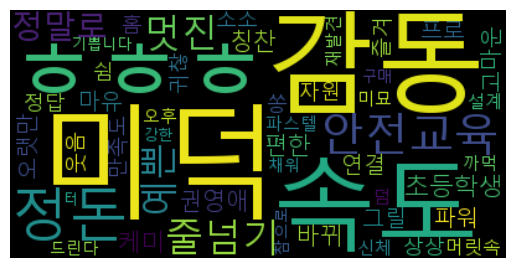

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 한글 폰트 설정(.ttf파일 다운로드 후 실행)
wordcloud_high = WordCloud('C:\Windows\Fonts'+'\malgun.ttf',max_words=50).generate_from_frequencies(high_review)
plt.imshow(wordcloud_high, interpolation='bilinear')
plt.axis('off')
plt.show()

## 부정적(감성사전 분류)

In [52]:
low_counter_diff_dict=low_counter_diff.set_index('단어').to_dict()
low_review=low_counter_diff_dict['갯수']
low_review

{'어려운데': 4,
 '이래도': 6,
 '일까': 4,
 '대답': 5,
 '거짓말': 7,
 '어쩌': 3,
 '상': 5,
 '따르': 3,
 '그렇': 3,
 '지칠': 4,
 '피해': 3,
 '도덕': 3,
 '살피': 3,
 '불응': 3,
 '가르쳐야': 5,
 '평': 3,
 '정심': 3,
 '바르': 3,
 '순간순간': 3,
 '될까': 3,
 '조근조근': 4,
 '위안': 5,
 '는구나': 4,
 '해준다': 3,
 '만남': 4,
 '오해': 8,
 '섭섭': 3,
 '대할': 3,
 '품': 3,
 '해답': 5,
 '화분': 3,
 '인테리어': 3,
 '민화': 4,
 '철학': 5,
 '못해': 5,
 '이리저리': 2,
 '흔들렸': 2,
 '아들러': 4,
 '려는': 5,
 '운동': 4,
 '려니': 5,
 '스트레칭': 2,
 '요가': 2,
 '자격': 2,
 '평화': 6,
 '해줍니다': 5,
 '권합니다': 2,
 '발생': 3,
 '넓힐': 5,
 '하반기': 2,
 '내년': 5,
 '조성': 3,
 '히': 2,
 '풀리': 4,
 '찰나': 1,
 '골든벨': 1,
 '연극': 5,
 '어떨까': 1,
 '고학년': 5,
 '마침': 3,
 '예상': 2,
 '가벼운': 3,
 '간략': 1,
 '싫': 5,
 '즐거운': 1,
 '어느덧': 2,
 '베테랑': 3,
 '돌발': 2,
 '반응': 4,
 '찰': 2,
 '성향': 3,
 '따른': 5,
 '현명': 2,
 '거듭나': 4,
 '봐야겠습니다': 3,
 '강조': 4,
 '세': 1,
 '편리': 2,
 '유': 1,
 '질문': 2,
 '한계점': 1,
 '심도': 2,
 '원래': 1,
 '이외': 3,
 '해질': 3,
 '클릭': 3,
 '스마트': 5,
 '자격증': 5,
 '필수': 1,
 '한참': 2,
 '예민': 1,
 '의사': 1,
 '독특': 1,
 '조합': 5,
 '인하': 2,
 '호르몬': 5,
 '만만': 

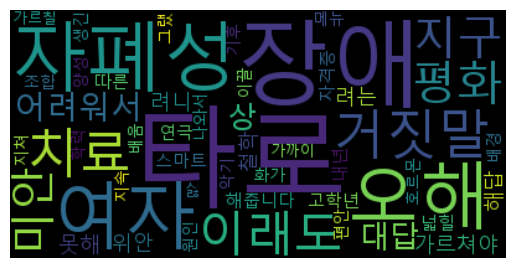

In [53]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 한글 폰트 설정(.ttf파일 다운로드 후 실행)
wordcloud_low = WordCloud('C:\Windows\Fonts'+'\malgun.ttf',max_words=50).generate_from_frequencies(low_review)
plt.imshow(wordcloud_low, interpolation='bilinear')
plt.axis('off')
plt.show()

In [54]:
# 파이 출력을 위해 상위 10개만 파이로 출력
for_pie_high=high_counter_diff.sort_values('갯수',ascending=False)[:25]
for_pie_low=low_counter_diff.sort_values('갯수',ascending=False)[:25]

In [57]:
from dash import Dash, html, dcc, callback, Output, Input
import plotly.express as px

app = Dash(__name__)

high_wordcloud=px.imshow(wordcloud_high)
low_wordcloud=px.imshow(wordcloud_low)
# high_pie=px.pie(for_pie_high,values='갯수',names='단어')
# low_pie=px.pie(for_pie_low,values='갯수',names='단어')
high_graph=px.bar(for_pie_high,y='갯수',x='단어')
low_graph=px.bar(for_pie_low,y='갯수',x='단어')


app.layout = html.Div([
    html.Div([
        html.H1(children='긍정_워드클라우드', style={'textAlign':'center'}),
        dcc.Graph(figure=high_wordcloud),
    ],style={'width': '600px', 'height':'600px','margin': '0px 50px 50px 50px','display':'inline-block'}),
    html.Div([
        html.H1(children='부정_워드클라우드', style={'textAlign':'center'}),
        dcc.Graph(figure=low_wordcloud),
    ],style={'width': '600px', 'height':'600px','margin': '0px 50px 50px 50px','display':'inline-block'}),
    html.Div([
        html.H1(children='긍정 상위 25개', style={'textAlign':'center'}),
        dcc.Graph(figure=high_graph),
    ],style={'width': '600px', 'height':'600px','margin': '0px 50px 50px 50px','display':'inline-block'}),
    html.Div([
        html.H1(children='부정 상위 25개', style={'textAlign':'center'}),
        dcc.Graph(figure=low_graph),
    ],style={'width': '600px', 'height':'600px','margin': '0px 50px 50px 50px','display':'inline-block'})
],style={'width': '2000px'})

if __name__ == '__main__':
    app.run(debug=True)


In [58]:
high_counter_diff.sort_values('갯수',ascending=False) 

,단어,갯수
265,미덕,26
1217,감동,21
976,속도,18
1933,ㅎㅎㅎ,16
500,정돈,13
...,...,...
3194,트레이닝,1
3193,하드,1
3191,웠,1
3190,며칠,1


In [59]:
low_counter_diff.sort_values('갯수',ascending=False) 

,단어,갯수
1180,타로,17
1233,장애,12
1582,자폐성,9
678,여자,8
112,오해,8
...,...,...
1028,다변,1
2453,벅찼,1
1042,시행착오,1
2449,쌓여,1


# 3. 모델 분석로 분류한 긍정과 부정 그룹

In [74]:
# 로우 데이터 불러오기 = df
df = pd.read_excel('model_classification_data10.xlsx')
df.head(2)

,index,제목,연수명,분류,만족도,내용,label,pre_label
0,0,유용한 연수였습니다.,유럽여행을 위한 미술 이야기,자기계발,5,유용한 연수였습니다.,1,1
1,1,한국 근 현대사 공부에 가장 적합한 연수입니다.,설민석의 한국사능력검정시험[심화]-하,학습지도,5,한국 근 현대사 공부에 가장 적합한 연수입니다.,1,1


In [75]:
#0이 부정/ 1이 긍정
con=df['pre_label']==1
positive=df[con]
negative=df[-con]

In [76]:
negative

,index,제목,연수명,분류,만족도,내용,label,pre_label
43,43,메타버스에 대해 아는 데 도움이 됩니다.,디지털 네이티브 아이들의 메타버스 세상,학습지도,5,메타버스에 대해 아는 데 도움이 됩니다.,1,0
80,80,자격증 취득이 목적이었는데.....,한국어교원양성과정 Ⅱ,자기계발,5,자격증 취득이 목적인데 너무 어렵습니다.\n교재가 있으면 적으면서 할건데 pdf파일...,1,0
109,109,유용한연수,한국어교원양성과정 Ⅲ,자기계발,5,한국어교원자격증을 위한 필수연수로 선택해서 들었습니다. 강의 구성내용이 알차고 알기...,1,0
126,126,중간평가 잘못된 문제가 2문제 정도 있는 것 같아요.,네이티브는 쉬운 중국어로 말한다,어학,5,다음 대화가 이루어진 상황으로 가장 알맞은 것을 고르세요.\nA:你属什么？\nB:我...,1,0
162,162,쉬운 생활영어,영어로 세계 속으로 with 내셔널 지오그래픽,어학,5,쉬운 생활영어로 리스닝 연습 가능,1,0
...,...,...,...,...,...,...,...,...
3267,3279,방법론적으로 더 구체적이였으면 좋겠네요,"차이를 만드는 교실 습관, 자율의 힘",학급경영,1,솔직히 너무 추상적이여서 당장 현장에 투입되어야하는 교사들에게는 바로 사용하기 어려워요,0,0
3313,3326,강추,디지털 드로잉으로 학급경영하기,학급경영,5,아이패드 갖고계신분\n아직 프로크리에이트 메디방을 이용하는 방법을 잘 모르는 분\n...,1,0
3408,3422,법정연수 한 번에 들을 수 있어서 좋아요.,법정의무교육 한 번에 이수하기,생활지도,5,연수 제목에 연수 내용이 포함되면 좋겠습니다.(제출용),1,0
3439,3453,추천합니다,법정의무교육 한 번에 이수하기,생활지도,5,매년 같은 내용의 법정의무연수 자체는 참 문제가 많다고 생각한다. 타 무료 연수원 ...,1,0


In [77]:
def unify(li):
    divided=[]
    for l in li:
        divided.append(l.split())
    return divided
positive_li=unify(list(positive['내용']))
negative_li=unify(list(negative['내용']))

In [78]:
#한 리스트로 결합
def list_smaller(l):
    oneline=[]
    for data in l:
        oneline+=data
    return oneline
posi_l=list_smaller(positive_li)
nega_l=list_smaller(negative_li)

In [79]:
#불용어 사전 
new_posi=[]
for l in posi_l:
    if l in lst: #korean stopword 삭제
        pass
    elif re.search('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]',l): # 한글이 아닌 내용 삭제
        pass
    else:
        new_posi.append(l) # 남은 내용만 모으기
new_posi

['유용한',
 '한국',
 '근',
 '현대사',
 '공부에',
 '가장',
 '적합한',
 '사람과의',
 '관계가',
 '너무',
 '어려운데',
 '이래도',
 '때로는',
 '마음에도',
 '없는',
 '말로',
 '대답하는',
 '거짓말해서',
 '직업상',
 '나의',
 '지시에',
 '전혀',
 '따르지',
 '않는',
 '학생이',
 '있는데',
 '그런',
 '사람과의',
 '관계가',
 '힘들고',
 '너무',
 '지칠',
 '수',
 '있는',
 '거라면',
 '피해나',
 '도덕적으로',
 '잘못된',
 '것이',
 '아닌',
 '거짓말로',
 '상대의',
 '기분을',
 '살피면서',
 '했던',
 '말들은',
 '괜찮다고',
 '교사의',
 '지시에',
 '불응하는',
 '학생은',
 '내가',
 '잘못한',
 '것이',
 '아니라',
 '학생의',
 '상태가',
 '그런',
 '것이니',
 '나의',
 '잘못이',
 '꼭',
 '가르쳐야',
 '할',
 '것을',
 '평정심을',
 '가지고',
 '반복하여',
 '바르게',
 '가르치려',
 '노력하면',
 '된다',
 '라고',
 '삶의',
 '순간순간',
 '의문이',
 '들거나',
 '이래도',
 '될까',
 '하는',
 '문제들에',
 '대해',
 '조근조근',
 '설명해주시는',
 '강사님',
 '덕분에',
 '마음에',
 '위안을',
 '얻고',
 '내가',
 '잘하고',
 '있구나',
 '괜찮구나',
 '이렇게',
 '하면',
 '되는구나',
 '하는',
 '마음을',
 '갖게',
 '하지현',
 '요즘',
 '만남에서는',
 '사람을',
 '더',
 '잘',
 '이해하고',
 '상대할',
 '수',
 '있어서',
 '오해나',
 '섭섭한',
 '마음이',
 '덜',
 '생기게',
 '연수에서',
 '상황별로',
 '유형의',
 '특성을',
 '설명해',
 '주어',
 '더',
 '잘',
 '알게',
 '가족이나',
 '학생들을',
 '대할',
 '마음',
 '넓은',


In [80]:
new_nega=[]
for l in nega_l:
    if l in lst: #korean stopword 삭제
        pass
    elif re.search('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]',l): # 한글이 아닌 내용 삭제
        pass
    else:
        new_nega.append(l) # 남은 내용만 모으기
new_nega

['메타버스에',
 '대해',
 '아는',
 '데',
 '도움이',
 '자격증',
 '취득이',
 '목적인데',
 '너무',
 '교재가',
 '있으면',
 '적으면서',
 '할건데',
 '아쉬움이',
 '한글파일로',
 '올려주시면',
 '한국어교원자격증을',
 '위한',
 '필수연수로',
 '선택해서',
 '강의',
 '구성내용이',
 '알차고',
 '알기쉽게',
 '설명해줘서',
 '이해하기',
 '대화가',
 '이루어진',
 '상황으로',
 '가장',
 '알맞은',
 '것을',
 '위에',
 '문제는',
 '띠가',
 '뭐냐고',
 '묻는',
 '문제인데',
 '정답에',
 '띠를',
 '묻는다는',
 '선택지가',
 '정답은',
 '나이를',
 '말할',
 '때로',
 '라고',
 '되었는데',
 '뭐',
 '간접적으로',
 '알',
 '수',
 '있겠지만',
 '상황인',
 '쉬운',
 '생활영어로',
 '리스닝',
 '연습',
 '가능',
 '성인도',
 '말문이',
 '터지는',
 '엄마표',
 '영어의',
 '모든',
 '영재',
 '강사로',
 '활동하기',
 '위해',
 '강의',
 '곳',
 '보다',
 '가격이',
 '저렴해서',
 '좋았지만',
 '강의',
 '자체는',
 '오래',
 '된',
 '같아서',
 '요즘에',
 '맞춰서',
 '새단장',
 '해주시면',
 '좋을',
 '가장',
 '쉬운',
 '패들렛과',
 '띵커벨을',
 '통해',
 '학생들과',
 '상호작용이',
 '유용해졌다',
 '유용한',
 '정보를',
 '안내해주셔서',
 '실생활에',
 '도움이',
 '많이',
 '되었습니다',
 '꾸준히',
 '유지하고자',
 '키우는',
 '기초학력',
 '교육',
 '온라인',
 '수업에',
 '활용',
 '가능한',
 '정보가',
 '실제',
 '강의',
 '내용과',
 '평가',
 '문항의',
 '연관성이',
 '크지',
 '강의를',
 '열심히',
 '들었다면',
 '문제',
 '풀이에',
 '어려움이',
 '없어야'

In [81]:
high=new_posi
low=new_nega

In [82]:
from collections import Counter

counter=Counter(high)
high_counter=pd.DataFrame.from_dict(data=dict(counter),orient='index')
high_counter.reset_index(inplace=True)
high_counter.columns = ['단어','갯수']

counter=Counter(low)
low_counter=pd.DataFrame.from_dict(data=dict(counter),orient='index')
low_counter.reset_index(inplace=True)
low_counter.columns = ['단어','갯수']

In [83]:
#불용어 사전(부정,긍정 그룹 중 공통 단어 삭제)
low_word=list(low_counter['단어'])
high_word=list(high_counter['단어'])

# 같은 문자 제거
def del_common_word(counter,word):
    handle=counter['단어'].apply(lambda x: True if x in word else False) #같은 단어면 True
    counter_comm=counter[handle]# 같은 문자가 어떤 것인지 마스킹 됨
    print("삭제대상")
    a=counter_comm[counter_comm['갯수']>5]
    print(a.sort_values('갯수',ascending=False))# 출력-삭제 대상
    common=list(counter_comm[counter_comm['갯수']>5]['단어'])# high에서 없애야할 대상(조건: 5번 이상 반복 출현)
    return counter[counter['단어'].apply(lambda x: False if x in common else True)] #제거된 상황
high_counter_diff= del_common_word(high_counter,low_word)
low_counter_diff=del_common_word(low_counter,high_word)

삭제대상
         단어    갯수
29        수  1743
30       있는   792
298     연수를   689
94        잘   560
126      연수   491
...     ...   ...
6957     상담     6
7450     나갈     6
7468   부분에서     6
1285    명쾌한     6
1799  중요하다는     6

[549 rows x 2 columns]
삭제대상
      단어  갯수
51     수  35
262   연수  23
119    더  22
4    도움이  21
8     너무  21
93    많이  21
130   있는  19
241   영어  14
20    강의  11
333  내용이  11
111  강의를  11
112  열심히  11
216    할  11
194    잘  11
248  연수를   9
234   하는   9
197   같은   9
132   좋은   9
126  내용을   8
54    쉬운   8
105   실제   7
95   꾸준히   7
303   다시   7
308  한국어   7
357  생각이   7
471  이해가   7
534   구글   7
221  유익한   6
223  시간이   6
254   정말   6
82    좋을   6
286    한   6
387    듯   6


# 긍정적(모델분류)

In [84]:
high_counter_diff_dict=high_counter_diff.set_index('단어').to_dict()
high_review=high_counter_diff_dict['갯수']
high_review

{'한국': 10,
 '근': 3,
 '현대사': 2,
 '적합한': 5,
 '사람과의': 6,
 '관계가': 8,
 '어려운데': 4,
 '이래도': 6,
 '때로는': 12,
 '마음에도': 3,
 '말로': 6,
 '대답하는': 3,
 '거짓말해서': 3,
 '직업상': 3,
 '나의': 53,
 '지시에': 6,
 '따르지': 3,
 '학생이': 9,
 '힘들고': 8,
 '지칠': 3,
 '거라면': 3,
 '피해나': 3,
 '도덕적으로': 3,
 '잘못된': 6,
 '거짓말로': 3,
 '상대의': 4,
 '기분을': 5,
 '살피면서': 3,
 '했던': 20,
 '말들은': 3,
 '괜찮다고': 3,
 '교사의': 49,
 '불응하는': 3,
 '학생은': 4,
 '내가': 65,
 '잘못한': 4,
 '아니라': 85,
 '학생의': 11,
 '상태가': 3,
 '것이니': 3,
 '잘못이': 4,
 '꼭': 200,
 '가르쳐야': 7,
 '평정심을': 3,
 '가지고': 41,
 '반복하여': 12,
 '바르게': 5,
 '가르치려': 3,
 '노력하면': 4,
 '된다': 3,
 '삶의': 11,
 '순간순간': 3,
 '의문이': 7,
 '들거나': 3,
 '될까': 5,
 '문제들에': 5,
 '조근조근': 4,
 '설명해주시는': 12,
 '마음에': 30,
 '위안을': 5,
 '얻고': 9,
 '잘하고': 12,
 '괜찮구나': 3,
 '되는구나': 3,
 '마음을': 69,
 '갖게': 30,
 '하지현': 5,
 '만남에서는': 3,
 '사람을': 8,
 '상대할': 3,
 '오해나': 3,
 '섭섭한': 3,
 '마음이': 66,
 '덜': 14,
 '생기게': 11,
 '상황별로': 10,
 '유형의': 7,
 '특성을': 8,
 '주어': 15,
 '가족이나': 3,
 '학생들을': 30,
 '대할': 4,
 '사람이': 11,
 '자연': 4,
 '생태': 2,
 '등에': 7,
 '관심': 11,
 '있으신': 10

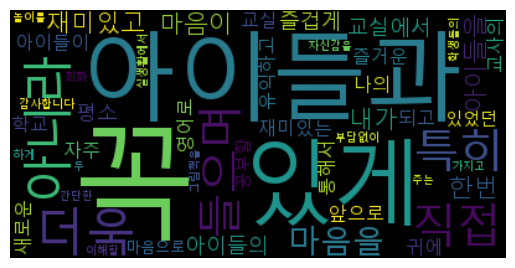

In [85]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 한글 폰트 설정(.ttf파일 다운로드 후 실행)
wordcloud_high = WordCloud('C:\Windows\Fonts'+'\malgun.ttf',max_words=50).generate_from_frequencies(high_review)
plt.imshow(wordcloud_high, interpolation='bilinear')
plt.axis('off')
plt.show()

In [86]:
low_counter_diff_dict=low_counter_diff.set_index('단어').to_dict()
low_review=low_counter_diff_dict['갯수']
low_review

{'메타버스에': 1,
 '대해': 2,
 '아는': 2,
 '데': 1,
 '자격증': 5,
 '취득이': 2,
 '목적인데': 2,
 '교재가': 3,
 '있으면': 4,
 '적으면서': 2,
 '할건데': 2,
 '아쉬움이': 3,
 '한글파일로': 2,
 '올려주시면': 2,
 '한국어교원자격증을': 1,
 '위한': 2,
 '필수연수로': 1,
 '선택해서': 1,
 '구성내용이': 1,
 '알차고': 1,
 '알기쉽게': 1,
 '설명해줘서': 1,
 '이해하기': 2,
 '대화가': 2,
 '이루어진': 2,
 '상황으로': 2,
 '가장': 5,
 '알맞은': 2,
 '것을': 5,
 '위에': 2,
 '문제는': 3,
 '띠가': 2,
 '뭐냐고': 2,
 '묻는': 2,
 '문제인데': 2,
 '정답에': 2,
 '띠를': 2,
 '묻는다는': 2,
 '선택지가': 2,
 '정답은': 2,
 '나이를': 2,
 '말할': 2,
 '때로': 2,
 '라고': 4,
 '되었는데': 2,
 '뭐': 2,
 '간접적으로': 2,
 '알': 2,
 '있겠지만': 2,
 '상황인': 2,
 '생활영어로': 2,
 '리스닝': 2,
 '연습': 2,
 '가능': 2,
 '성인도': 1,
 '말문이': 3,
 '터지는': 1,
 '엄마표': 1,
 '영어의': 1,
 '모든': 1,
 '영재': 1,
 '강사로': 1,
 '활동하기': 1,
 '위해': 3,
 '곳': 1,
 '보다': 2,
 '가격이': 1,
 '저렴해서': 1,
 '좋았지만': 1,
 '자체는': 3,
 '오래': 1,
 '된': 2,
 '같아서': 3,
 '요즘에': 1,
 '맞춰서': 1,
 '새단장': 1,
 '해주시면': 1,
 '패들렛과': 2,
 '띵커벨을': 2,
 '통해': 5,
 '학생들과': 2,
 '상호작용이': 2,
 '유용해졌다': 2,
 '유용한': 5,
 '정보를': 2,
 '안내해주셔서': 2,
 '실생활에': 3,
 '되었습니다': 2,
 '유지하고자': 

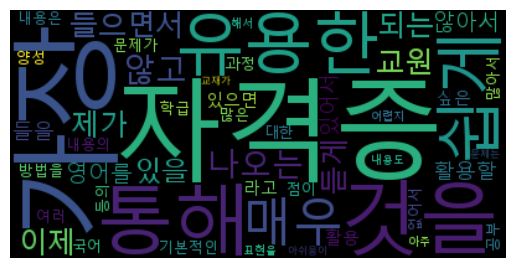

In [87]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 한글 폰트 설정(.ttf파일 다운로드 후 실행)
wordcloud_low = WordCloud('C:\Windows\Fonts'+'\malgun.ttf',max_words=50).generate_from_frequencies(low_review)
plt.imshow(wordcloud_low, interpolation='bilinear')
plt.axis('off')
plt.show()

In [88]:
# 파이 출력을 위해 상위 10개만 파이로 출력
for_pie_high=high_counter_diff.sort_values('갯수',ascending=False)[:25]
for_pie_low=low_counter_diff.sort_values('갯수',ascending=False)[:25]

In [89]:
from dash import Dash, html, dcc, callback, Output, Input
import plotly.express as px

app = Dash(__name__)

high_wordcloud=px.imshow(wordcloud_high)
low_wordcloud=px.imshow(wordcloud_low)
# high_pie=px.pie(for_pie_high,values='갯수',names='단어')
# low_pie=px.pie(for_pie_low,values='갯수',names='단어')
high_graph=px.bar(for_pie_high,y='갯수',x='단어')
low_graph=px.bar(for_pie_low,y='갯수',x='단어')


app.layout = html.Div([
    html.Div([
        html.H1(children='긍정_워드클라우드', style={'textAlign':'center'}),
        dcc.Graph(figure=high_wordcloud),
    ],style={'width': '600px', 'height':'600px','margin': '0px 50px 50px 50px','display':'inline-block'}),
    html.Div([
        html.H1(children='부정_워드클라우드', style={'textAlign':'center'}),
        dcc.Graph(figure=low_wordcloud),
    ],style={'width': '600px', 'height':'600px','margin': '0px 50px 50px 50px','display':'inline-block'}),
    html.Div([
        html.H1(children='긍정 상위 25개', style={'textAlign':'center'}),
        dcc.Graph(figure=high_graph),
    ],style={'width': '600px', 'height':'600px','margin': '0px 50px 50px 50px','display':'inline-block'}),
    html.Div([
        html.H1(children='부정 상위 25개', style={'textAlign':'center'}),
        dcc.Graph(figure=low_graph),
    ],style={'width': '600px', 'height':'600px','margin': '0px 50px 50px 50px','display':'inline-block'})
],style={'width': '2000px'})

if __name__ == '__main__':
    app.run(debug=True)


In [90]:
low_counter_diff.sort_values('갯수',ascending=False).head(50)

,단어,갯수
493,듣게,5
309,교원,5
189,나오는,5
31,것을,5
29,가장,5
384,되는,5
249,들으면서,5
807,않아서,5
250,제가,5
139,쉽게,5
